# Load & Process Data With Dataset Pipeline

[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/mindspore/blob/master/docs/api/api_python_en/samples/dataset/dataset_gallery.ipynb)

This example illustrates the various usages available in the [mindspore.dataset](https://www.mindspore.cn/docs/en/master/api_python/mindspore.dataset.html) module.

## Basic Environment Preparation

In [1]:
from download import download
import matplotlib.pyplot as plt

import mindspore.dataset as ds
import mindspore.dataset.vision as vision

# Download opensource datasets
mnist_url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/MNIST_Data.zip"
download(mnist_url, "./", kind="zip", replace=True)

cifar10_url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/cifar-10-binary.tar.gz"
download(cifar10_url, "./", kind="tar.gz", replace=True)

# Env set for randomness and prepare plot function
ds.config.set_seed(0)

def plot(imgs, first_origin=None):
    num_rows = 1
    num_cols = len(imgs)

    _, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for idx, img in enumerate(imgs):
        ax = axs[0, idx]
        ax.imshow(img.asnumpy())
        ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if first_origin:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    plt.tight_layout()


file_sizes: 100%|██████████████████████████| 10.8M/10.8M [00:00<00:00, 10.9MB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./

file_sizes: 100%|████████████████████████████| 170M/170M [00:13<00:00, 12.9MB/s]
Extracting tar.gz file...
Successfully downloaded / unzipped to ./


## Load Open Source Datasets

Load MNIST/Cifar10 dataset with [mindspore.dataset.MnistDataset](https://mindspore.cn/docs/en/master/api_python/dataset/mindspore.dataset.MnistDataset.html#mindspore.dataset.MnistDataset) and [mindspore.dataset.Cifar10Dataset](https://mindspore.cn/docs/en/master/api_python/dataset/mindspore.dataset.Cifar10Dataset.html#mindspore.dataset.Cifar10Dataset).

Examples shows how to load dataset files and show the content.

### Load MNIST Dataset

['vision_gallery.ipynb', 'MNIST_Data', 'text_gallery.ipynb', 'imageset', 'cifar-10-batches-bin', 'audio_gallery.ipynb', 'dataset_gallery.ipynb']
image shape (28, 28, 1) label shape ()
image shape (28, 28, 1) label shape ()
image shape (28, 28, 1) label shape ()
image shape (28, 28, 1) label shape ()
image shape (28, 28, 1) label shape ()
image shape (28, 28, 1) label shape ()


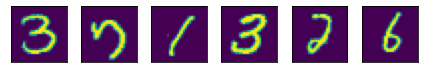

In [2]:
import os

# Show the directory
print(os.listdir())

# Load MNIST dataset
mnist_dataset = ds.MnistDataset("MNIST_Data/train")

# Iter the dataset to collect 5 samples
images = []
for image, label in mnist_dataset:
    print("image shape", image.shape, "label shape", label.shape)
    images.append(image)
    if len(images) > 5:
        break

plot(images)

### Load Cifar Dataset

['vision_gallery.ipynb', 'MNIST_Data', 'text_gallery.ipynb', 'imageset', 'cifar-10-batches-bin', 'audio_gallery.ipynb', 'dataset_gallery.ipynb']
image shape (32, 32, 3) label shape ()
image shape (32, 32, 3) label shape ()
image shape (32, 32, 3) label shape ()
image shape (32, 32, 3) label shape ()
image shape (32, 32, 3) label shape ()
image shape (32, 32, 3) label shape ()


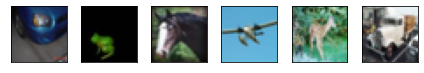

In [3]:
import os

# Show the directory
print(os.listdir())

# Load Cifar10 dataset
cifar_dataset = ds.Cifar10Dataset("cifar-10-batches-bin")

# Iter the dataset to collect 5 samples
images = []
for image in cifar_dataset:
    print("image shape", image[0].shape, "label shape", image[1].shape)
    images.append(image[0])
    if len(images) > 5:
        break

plot(images)

### Load Dataset In Folders

For ImageNet dataset or other datasets with similar structure, it is suggest to use [mindspore.dataset.ImageFolderDataset](https://mindspore.cn/docs/en/master/api_python/dataset/mindspore.dataset.ImageFolderDataset.html#mindspore.dataset.ImageFolderDataset) to load files into dataset pipeline.

```text
Structure of ImageNet dataset:

/path/to/ImageNet2012/
├── train
│   ├── n01440764
|   |   ├── 000000000001.jpg
|   |   ├── 000000000002.jpg
|   |   ├── ...
│   ├── n01484850
|   |   ├── 000000000001.jpg
|   |   ├── 000000000002.jpg
|   |   ├── ...
│   ├── n01494475
│   └── ...
└── val
    ├── n11879895
    └── ...
```

This example shows how to load dataset files in tree folder structure, the code will download imageset folders with following structure and load it.

```text
imageset/
├── cat
│   ├── cat_0.jpg
│   ├── cat_1.jpg
│   └── cat_2.jpg
├── fish
│   ├── fish_0.jpg
│   ├── fish_1.jpg
│   ├── fish_2.jpg
│   └── fish_3.jpg
├── fruits
│   ├── fruits_0.jpg
│   ├── fruits_1.jpg
│   └── fruits_2.jpg
├── plane
│   ├── plane_0.jpg
│   ├── plane_1.jpg
│   └── plane_2.jpg
└── tree
    ├── tree_0.jpg
    ├── tree_1.jpg
    └── tree_2.jpg
```


file_sizes: 100%|███████████████████████████| 45.7k/45.7k [00:00<00:00, 958kB/s]
Extracting zip file...
Successfully downloaded / unzipped to ./
image shape (64, 64, 3) label 0
image shape (64, 64, 3) label 4
image shape (64, 64, 3) label 0
image shape (64, 64, 3) label 1
image shape (64, 64, 3) label 2
image shape (64, 64, 3) label 3
image shape (64, 64, 3) label 1
image shape (64, 64, 3) label 3
image shape (64, 64, 3) label 1
image shape (64, 64, 3) label 3
image shape (64, 64, 3) label 1
image shape (64, 64, 3) label 4
image shape (64, 64, 3) label 4
image shape (64, 64, 3) label 0
image shape (64, 64, 3) label 2
image shape (64, 64, 3) label 2


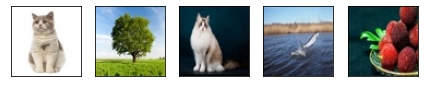

In [4]:
# Download a small image set as example
url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/imageset.zip"
download(url, "./", kind="zip", replace=True)

# There are 5 classes in the image folder.
os.listdir("./imageset")

# Pass the image folder path to ImageFolderDataset, like "/path/to/ImageNet2012/train"
imagenet_dataset = ds.ImageFolderDataset("./imageset", decode=True)

# Iter the dataset to get outputs
images = []
for image, label in imagenet_dataset:
    images.append(image)
    print("image shape", image.shape, "label", label)

plot(images[:5], False)

## Load Customized Dataset

`mindspore.dataset` module provides the loading APIs for some common datasets and standard format datasets.

For those datasets that MindSpore does not support yet, [mindspore.dataset.GeneratorDataset](https://mindspore.cn/docs/en/master/api_python/dataset/mindspore.dataset.GeneratorDataset.html#mindspore.dataset.GeneratorDataset) provides ways for users to load and process their data manually.

`GeneratorDataset` supports constructing customized datasets from random-accessible objects, iterable objects and Python generator.

### Random-accessible Dataset

A Random-accessible dataset is one that implements the `__getitem__` and `__len__` methods, which represents a map from indices/keys to data samples.

For example, when access a dataset with `dataset[idx]`, it should read the idx-th data inside the dataset content.

In [5]:
# Define randomaccessable class to load and process data
class RandomAccessDataset():
    def __init__(self):
        '''init the class object to hold the data'''
        self.data = [i for i in range(5)]
    def __getitem__(self, id):
        '''overrode the getitem method to support random access'''
        return self.data[id]
    def __len__(self):
        '''specify the length of data'''
        return len(self.data)

dataset = RandomAccessDataset()
print("Access with dataset[0]", dataset[0])

# Create a dataloader
dataloader1 = ds.GeneratorDataset(RandomAccessDataset(), column_names=["data"])

# Iter the dataset and check if the data is created successful
for data in dataloader1:
    print("RandomAccess dataset:", data)

Access with dataset[0] 0
RandomAccess dataset: [Tensor(shape=[], dtype=Int64, value= 2)]
RandomAccess dataset: [Tensor(shape=[], dtype=Int64, value= 4)]
RandomAccess dataset: [Tensor(shape=[], dtype=Int64, value= 3)]
RandomAccess dataset: [Tensor(shape=[], dtype=Int64, value= 0)]
RandomAccess dataset: [Tensor(shape=[], dtype=Int64, value= 1)]


### Iterable Dataset

An iterable dataset is one that implements the `__iter__` and `__next__` methods, which represents an iterator to return data samples gradually. This type of datasets is suitable for cases where random access are expensive or forbidden.

For example, when access a dataset with `iter(dataset)`, it should return a stream of data from a database or a remote server.

In [6]:
# Define iterable class to load and process data
class IterableDataset():
    def __init__(self, start, end):
        '''init the class object to hold the data'''
        self.start = start
        self.end = end
    def __next__(self):
        '''iter one data and return'''
        return next(self.data)
    def __iter__(self):
        '''reset the iter'''
        self.data = iter(range(self.start, self.end))
        return self

dataset = IterableDataset(0, 5)
print("Iter dataset with next(iter(dataset))", next(iter(dataset)))

# Create a dataloader
dataloader2 = ds.GeneratorDataset(IterableDataset(0, 5), column_names=["data"])

# Iter the dataset and check if the data is created successful
for data in dataloader2:
    print("Iterable dataset:", data)

Iter dataset with next(iter(dataset)) 0
Iterable dataset: [Tensor(shape=[], dtype=Int64, value= 0)]
Iterable dataset: [Tensor(shape=[], dtype=Int64, value= 1)]
Iterable dataset: [Tensor(shape=[], dtype=Int64, value= 2)]
Iterable dataset: [Tensor(shape=[], dtype=Int64, value= 3)]
Iterable dataset: [Tensor(shape=[], dtype=Int64, value= 4)]


### Generator

Generator also belongs to iterable dataset type, it can be a Python generator to return data until the generator throws a StopIteration exception.

In [7]:
# Define a generator
def my_generator(start, end):
    for i in range(start, end):
        yield i

# Since a generator instance can be only iterated once, we need to wrap it by lambda to generate multiple instances
dataloader3 = ds.GeneratorDataset(source=lambda: my_generator(3, 6), column_names=["data"])

for data in dataloader3:
    print("Generator", data)

Generator [Tensor(shape=[], dtype=Int64, value= 3)]
Generator [Tensor(shape=[], dtype=Int64, value= 4)]
Generator [Tensor(shape=[], dtype=Int64, value= 5)]


## Get Attributes Of Dataset

Once a dataset is defined, it is convenient to get attributes of it through "getter" APIs.

Example shows how to get the basic attributes of dataset such as types, shapes, sizes, e.g.

In [8]:
# Take Cifar dataset as example
cifar_dataset = ds.Cifar10Dataset("cifar-10-batches-bin")

# Get how many samples in the dataset
print("length of cifar10 dataset:", len(cifar_dataset))
print("length of cifar10 dataset:", cifar_dataset.get_dataset_size())

# Get the data columns in dataset
print("data columns of cifar10 dataset:", cifar_dataset.get_col_names())

# Get the shapes of first sample, shown in data column order
print("shapes of cifar10 dataset sample:", cifar_dataset.output_shapes())

# Get the types of first sample, shown in data column order
print("types of cifar10 dataset sample:", cifar_dataset.output_types())

length of cifar10 dataset: 60000
length of cifar10 dataset: 60000
data columns of cifar10 dataset: ['image', 'label']
shapes of cifar10 dataset sample: [[32, 32, 3], []]
types of cifar10 dataset sample: [dtype('uint8'), dtype('uint32')]


## Apply Transforms On Dataset

A source dataset object only represents the origin state of dataset which means that it has not been processed by any transforms.

Generally speaking, we need to apply some augmentations on dataset to make it fit train.

In [9]:
# Take Cifar dataset as example
cifar_dataset = ds.Cifar10Dataset("cifar-10-batches-bin")

# Apply batch on dataset, then we got a new sample with 5 image batched together
cifar_dataset = cifar_dataset.batch(5)

batched_image, batched_label = next(iter(cifar_dataset))
print("Apply batch operation...")
print("batched_image", batched_image.shape, "batched_label", batched_label.shape)

# Take 3 batches from dataset
print("Apply take operation...")
cifar_dataset = cifar_dataset.take(3)

for i, (image, label) in enumerate(cifar_dataset):
    print(f"Take 3 batches, {i+1}/3 batch:", image.shape, label.shape)

# Map augmentations on each images in batch
print("Apply map operation...")

## option 1. use transform as function call, input_columns means apply transform on "image" column
def augment(imgs):
    resize = vision.Resize(size=(16, 16))
    return resize(imgs)
cifar_dataset = cifar_dataset.map(operations=augment, input_columns=["image"])

## option 2. embed transform into dataset pipeline, input_columns means apply transform on "image" column
cifar_dataset = cifar_dataset.map(operations=vision.Resize(size=(16, 16)), input_columns=["image"])

for i, (image, label) in enumerate(cifar_dataset):
    print(f"Map transforms on 3 batches, {i+1}/3 batch:", image.shape, label.shape)

Apply batch operation...
batched_image (5, 32, 32, 3) batched_label (5,)
Apply take operation...
Take 3 batches, 1/3 batch: (5, 32, 32, 3) (5,)
Take 3 batches, 2/3 batch: (5, 32, 32, 3) (5,)
Take 3 batches, 3/3 batch: (5, 32, 32, 3) (5,)
Apply map operation...
Map transforms on 3 batches, 1/3 batch: (5, 16, 16, 3) (5,)
Map transforms on 3 batches, 2/3 batch: (5, 16, 16, 3) (5,)
Map transforms on 3 batches, 3/3 batch: (5, 16, 16, 3) (5,)
